In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit, learning_curve, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
df = pd.read_csv("D:/Swinburne/Sem 3/Innovation Project/Data Sciencne/fraudTrain.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
#Display the data
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
#Sum the missing value
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
#Summary the description of the dataset
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [8]:
#Distribute the class
df[('is_fraud')].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [9]:
#Split the column trans_date_trans_time into 2 separate columns, including trans_date and trans_time
df['trans_date'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S').dt.date
df['trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S').dt.time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [10]:
# Remove the 'trans_date_trans_time' column
# Check if the index column exists and remove it
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop('trans_date_trans_time', axis=1, inplace=True)

In [11]:
# Reorder the columns to have 'trans_date' first and 'trans_time' second
columns = ['trans_date', 'trans_time'] + [col for col in df.columns if col not in ['trans_date', 'trans_time']]
df = df[columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_date  1296675 non-null  object 
 1   trans_time  1296675 non-null  object 
 2   cc_num      1296675 non-null  int64  
 3   merchant    1296675 non-null  object 
 4   category    1296675 non-null  object 
 5   amt         1296675 non-null  float64
 6   first       1296675 non-null  object 
 7   last        1296675 non-null  object 
 8   gender      1296675 non-null  object 
 9   street      1296675 non-null  object 
 10  city        1296675 non-null  object 
 11  state       1296675 non-null  object 
 12  zip         1296675 non-null  int64  
 13  lat         1296675 non-null  float64
 14  long        1296675 non-null  float64
 15  city_pop    1296675 non-null  int64  
 16  job         1296675 non-null  object 
 17  dob         1296675 non-null  object 
 18  trans_num   1296675 no

From the dtype of the dataset, we still have some tasks to do with the dtype. First of all, trans_date needed to be transferred from object/string to datetime

In [13]:
# Convert 'dob' to datetime
df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d')

# Convert 'trans_time' to time
df['trans_time'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S').dt.time

# Convert 'trans_date' to date
df['trans_date'] = pd.to_datetime(df['trans_date'])

# Check the data types
print("\nData types of the columns:")
print(df.dtypes)


Data types of the columns:
trans_date    datetime64[ns]
trans_time            object
cc_num                 int64
merchant              object
category              object
amt                  float64
first                 object
last                  object
gender                object
street                object
city                  object
state                 object
zip                    int64
lat                  float64
long                 float64
city_pop               int64
job                   object
dob           datetime64[ns]
trans_num             object
unix_time              int64
merch_lat            float64
merch_long           float64
is_fraud               int64
dtype: object


# Feature Engineering

# 1. Transaction Frequency Features

In [14]:
#Statistic summary of total transaction per user
df['cc_num'].value_counts().agg(['mean', 'median', 'min', 'max'])

mean      1319.099695
median    1054.000000
min          7.000000
max       3123.000000
Name: count, dtype: float64

In [15]:
# Total transactions of all users per day
df['transactions_per_day'] = df.groupby(['cc_num', df['trans_date'].dt.day])['trans_date'].transform('count')

print(df[['cc_num', 'trans_date', 'transactions_per_day']].head())


             cc_num trans_date  transactions_per_day
0  2703186189652095 2019-01-01                    69
1      630423337322 2019-01-01                    84
2    38859492057661 2019-01-01                    19
3  3534093764340240 2019-01-01                    19
4   375534208663984 2019-01-01                    82


In [16]:
# Create a 'Week' column using ISO calendar weeks
df['Week'] = df['trans_date'].dt.isocalendar().week

# Calculate total transactions per week for each customer
df['transaction_per_week'] = df.groupby(['cc_num', 'Week'])['trans_date'].transform('count')

# Display the updated dataframe with Week and total transactions per Week each customer columns
print(df[['cc_num', 'Week', 'transaction_per_week']].head())

             cc_num  Week  transaction_per_week
0  2703186189652095     1                    43
1      630423337322     1                    66
2    38859492057661     1                    11
3  3534093764340240     1                     8
4   375534208663984     1                    41


In [17]:
# Calculate total transactions per month for all users
total_transactions_per_month = df.groupby(df['trans_date'].dt.month).size()
# Display the total transactions per month
print(total_transactions_per_month)

trans_date
1     104727
2      97657
3     143789
4     134970
5     146875
6     143811
7      86596
8      87359
9      70652
10     68758
11     70421
12    141060
dtype: int64


In [18]:
# Total transactions of all users per day
df['transactions_per_month'] = df.groupby(['cc_num', df['trans_date'].dt.month])['trans_date'].transform('count')
print(df[['cc_num', 'trans_date', 'transactions_per_month']].head())

             cc_num trans_date  transactions_per_month
0  2703186189652095 2019-01-01                     177
1      630423337322 2019-01-01                     249
2    38859492057661 2019-01-01                      43
3  3534093764340240 2019-01-01                      35
4   375534208663984 2019-01-01                     170


In [19]:
#Transaction per season of all users
def season(date):
    if date.month in [1, 2, 3]:
        return 'Autumn'
    elif date.month in [4, 5, 6]:
        return 'Winter'
    elif date.month in [7, 8, 9]:
        return 'Spring'
    else:
        return 'Summer'
df['transactions_per_season'] = df.groupby(['cc_num', df['trans_date'].apply(season)])['trans_date'].transform('count')

## 2. User Transaction Behavior

In [20]:
## Perform the aggregations
agg_df = df.groupby('cc_num')['amt'].agg(
    avg_trans_amount='mean',
    total_trans_amount='sum',
    med_trans_amount='median',
    std_trans_amount='std'
).reset_index()

# Merge the aggregation results back to the original DataFrame
df = df.merge(agg_df, on='cc_num', how='left')



In [21]:
df

,trans_date,trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,is_fraud,transactions_per_day,Week,transaction_per_week,transactions_per_month,transactions_per_season,avg_trans_amount,total_trans_amount,med_trans_amount,std_trans_amount
0,2019-01-01,00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,0,69,1,43,177,548,87.393215,177233.44,53.885,126.596221
1,2019-01-01,00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,0,84,1,66,249,831,53.949320,163466.44,31.565,118.337621
2,2019-01-01,00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,0,19,1,11,43,131,65.870040,33132.63,47.530,101.585754
3,2019-01-01,00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,0,19,1,8,35,113,72.776673,35878.90,36.830,148.593473
4,2019-01-01,00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,0,82,1,41,170,555,95.178091,191974.21,75.690,89.133972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21,12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,0,62,25,41,148,473,63.182274,95594.78,40.740,98.227403
1296671,2020-06-21,12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,0,14,25,12,49,173,101.150621,53710.98,75.680,115.992546
1296672,2020-06-21,12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,0,69,25,61,230,654,65.235995,135038.51,38.610,131.805092
1296673,2020-06-21,12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,0,54,25,55,217,679,95.753691,193805.47,76.210,91.370450


## 3. User-Based Features: Age and Gender

In [22]:
#Calculate user's age based on date of birth and transaction date
def calculate_age(dob, trans_date):
    return trans_date.year - dob.year - ((trans_date.month, trans_date.day) < (dob.month, dob.day))
df['age'] = df.apply(lambda row: calculate_age(row['dob'], row['trans_date']), axis=1)

#Explore age stat
df['age'].agg(['mean', 'median', 'min', 'max'])

mean      45.496879
median    43.000000
min       13.000000
max       95.000000
Name: age, dtype: float64

In [23]:
#Convert gender to binary values
print('\n The number of cutomers based on age is:')
print(df['gender'].value_counts())
print("-" * 40)

#Total transaction amount by gender
print('\nTotal transaction amount made by gender is:')
print(df.groupby('gender')['amt'].sum())
print("-" * 40)

#Average transaction made by gender
print('\n Average transaction amount made by gender is:')
print(df.groupby('gender')['amt'].mean())
print("-" * 40)

# Calculate mean and median of age distribution by gender
print('\n Age Distribution by gender is:')
print(df.groupby('gender')['age'].agg(['mean', 'median']))
print("-" * 40)




 The number of cutomers based on age is:
gender
F    709863
M    586812
Name: count, dtype: int64
----------------------------------------

Total transaction amount made by gender is:
gender
F    49832612.83
M    41389816.07
Name: amt, dtype: float64
----------------------------------------

 Average transaction amount made by gender is:
gender
F    70.200324
M    70.533350
Name: amt, dtype: float64
----------------------------------------

 Age Distribution by gender is:
             mean  median
gender                   
F       45.401370    43.0
M       45.612414    44.0
----------------------------------------


## 4. Fraud Transaction Analysis

In [24]:
# Calculate fraudulent transactions per user
fraud_transactions_per_user = df.groupby('cc_num')['is_fraud'].sum().reset_index()
total_transactions_per_user = df.groupby('cc_num').size().reset_index(name='total_transactions')

# Merge to get fraud ratio per user
fraud_ratio_per_user = pd.merge(fraud_transactions_per_user, total_transactions_per_user, on='cc_num')
fraud_ratio_per_user['fraud_ratio'] = fraud_ratio_per_user['is_fraud'] / fraud_ratio_per_user['total_transactions']

# Merge fraud_ratio into the original dataset
df = pd.merge(df, fraud_ratio_per_user[['cc_num', 'fraud_ratio']], on='cc_num', how='left')

## 5. Geography Analysis

### 5.1 Distance calculation using Haversine calculation

This function  the great-circle distance between two points on the Earth's surface given their latitude and longitude coordinates. This function can be applied to gain insights from a dataset that includes geographical information, such as the coordinates of customer locations and merchant locations. 
* Are customers close to their preferred merchants? 
* Customer segmentation (near, moderate, far)
* 

In [25]:
# Create the Haversine function using transaction longitude and latitude, also using merchant's longitude and latitude
def haversine(lat1, lon1, lat2, lon2):
    # Distance between latitudes and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0

    # Convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0

    # Apply formula
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
         math.cos(lat1) * math.cos(lat2))
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

df['distance_to_merch'] = df.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)


In [26]:
df

,trans_date,trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,transaction_per_week,transactions_per_month,transactions_per_season,avg_trans_amount,total_trans_amount,med_trans_amount,std_trans_amount,age,fraud_ratio,distance_to_merch
0,2019-01-01,00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,43,177,548,87.393215,177233.44,53.885,126.596221,30,0.000000,78.597568
1,2019-01-01,00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,66,249,831,53.949320,163466.44,31.565,118.337621,40,0.000000,30.212176
2,2019-01-01,00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,11,43,131,65.870040,33132.63,47.530,101.585754,56,0.000000,108.206083
3,2019-01-01,00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,8,35,113,72.776673,35878.90,36.830,148.593473,51,0.030426,95.673231
4,2019-01-01,00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,41,170,555,95.178091,191974.21,75.690,89.133972,32,0.000000,77.556744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21,12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,41,148,473,63.182274,95594.78,40.740,98.227403,58,0.005948,119.752136
1296671,2020-06-21,12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,12,49,173,101.150621,53710.98,75.680,115.992546,40,0.015066,75.104085
1296672,2020-06-21,12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,61,230,654,65.235995,135038.51,38.610,131.805092,52,0.005314,99.047734
1296673,2020-06-21,12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,55,217,679,95.753691,193805.47,76.210,91.370450,39,0.003953,84.627652


In [27]:
# Aggregate transaction amounts by city
print("Aggregated transaction amounts by city:")
print(df.groupby('city')['amt'].sum().reset_index())
print("-" * 40)

# Aggregate transaction amounts by state
state_agg = df.groupby('state')['amt'].sum().reset_index()
print("Aggregated transaction amounts by state:")
print(df.groupby('state')['amt'].sum().reset_index())
print("-" * 40)



Aggregated transaction amounts by city:
                          city        amt
0                      Achille   32485.10
1                      Acworth  202428.03
2                        Adams   30856.91
3                        Afton  146101.84
4                        Akron   39798.32
..                         ...        ...
889                Woods Cross   48657.73
890                  Woodville  111276.82
891  Yellowstone National Park   34303.02
892                    Zaleski  151299.07
893                    Zavalla  107956.91

[894 rows x 2 columns]
----------------------------------------
Aggregated transaction amounts by state:
   state         amt
0     AK   144623.05
1     AL  2682717.10
2     AR  2342468.83
3     AZ   808325.53
4     CA  4138078.51
5     CO  1090171.31
6     CT   498323.98
7     DC   277115.46
8     DE     4630.44
9     FL  3155191.63
10    GA  1821058.13
11    HI   150985.03
12    IA  1770089.29
13    ID   405151.26
14    IL  3011891.30
15    IN  1896

In [28]:
df

,trans_date,trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,transaction_per_week,transactions_per_month,transactions_per_season,avg_trans_amount,total_trans_amount,med_trans_amount,std_trans_amount,age,fraud_ratio,distance_to_merch
0,2019-01-01,00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,43,177,548,87.393215,177233.44,53.885,126.596221,30,0.000000,78.597568
1,2019-01-01,00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,66,249,831,53.949320,163466.44,31.565,118.337621,40,0.000000,30.212176
2,2019-01-01,00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,11,43,131,65.870040,33132.63,47.530,101.585754,56,0.000000,108.206083
3,2019-01-01,00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,8,35,113,72.776673,35878.90,36.830,148.593473,51,0.030426,95.673231
4,2019-01-01,00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,41,170,555,95.178091,191974.21,75.690,89.133972,32,0.000000,77.556744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21,12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,41,148,473,63.182274,95594.78,40.740,98.227403,58,0.005948,119.752136
1296671,2020-06-21,12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,12,49,173,101.150621,53710.98,75.680,115.992546,40,0.015066,75.104085
1296672,2020-06-21,12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,61,230,654,65.235995,135038.51,38.610,131.805092,52,0.005314,99.047734
1296673,2020-06-21,12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,55,217,679,95.753691,193805.47,76.210,91.370450,39,0.003953,84.627652


## Merchant-based Features

In [29]:
# Merchant-Based Features
df['merchant_trans_count'] = df.groupby('merchant')['trans_num'].transform('count')
df['merchant_trans_amount'] = df.groupby('merchant')['amt'].transform('sum')
df['merchant_fraud_ratio'] = df.groupby('merchant')['is_fraud'].transform('mean')

## Category Based Features

In [30]:
# Category-Based Features
df['category_trans_count'] = df.groupby('category')['trans_num'].transform('count')
df['category_trans_amount'] = df.groupby('category')['amt'].transform('sum')
df['category_fraud_ratio'] = df.groupby('category')['is_fraud'].transform('mean')

## Temporal Features

Time Since Last Transaction: Time difference between the current transaction and the previous transaction.\p
Is Holiday: Indicator if the transaction date is a public holiday

In [31]:
# Temporal Features
holidays = pd.to_datetime(['2023-01-01', '2023-12-25'])  # Example holidays, replace with actual dates
df['is_holiday'] = df['trans_date'].isin(holidays)

In [32]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 42 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   trans_date               1296675 non-null  datetime64[ns]
 1   trans_time               1296675 non-null  object        
 2   cc_num                   1296675 non-null  int64         
 3   merchant                 1296675 non-null  object        
 4   category                 1296675 non-null  object        
 5   amt                      1296675 non-null  float64       
 6   first                    1296675 non-null  object        
 7   last                     1296675 non-null  object        
 8   gender                   1296675 non-null  object        
 9   street                   1296675 non-null  object        
 10  city                     1296675 non-null  object        
 11  state                    1296675 non-null  object        
 12  

# Oversampling Data

In [34]:
# List of columns to drop (date-related columns)
date_columns = ['trans_date','trans_num','first','last','dob','Week']

# Drop date-related columns from df
df_selected_features = df.drop(date_columns, axis=1)

# Encode categorical variables
label_encoders = {}
for column in df_selected_features.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    df_selected_features[column] = label_encoders[column].fit_transform(df_selected_features[column])

# Prepare X and y
X = df_selected_features.drop(['is_fraud'], axis=1)
y = df_selected_features['is_fraud']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply undersampling to handle class imbalance
rus = RandomUnderSampler(random_state=42)
X_train_scaled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [35]:
# Count occurrences of each class in y_train_resampled
fraud_count = pd.Series(y_train_resampled).value_counts()

print(f"Fraud class distribution after resampling:\n{fraud_count}")

Fraud class distribution after resampling:
is_fraud
0    5986
1    5986
Name: count, dtype: int64


In [36]:
# Calculate correlation matrix
correlation_matrix = X_train_scaled.corr()

correlation_matrix

,trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,age,fraud_ratio,distance_to_merch,merchant_trans_count,merchant_trans_amount,merchant_fraud_ratio,category_trans_count,category_trans_amount,category_fraud_ratio,is_holiday
trans_time,1.000000,0.004754,-0.003031,0.345638,0.259823,0.030872,0.008504,-0.009254,0.030574,-0.012093,...,0.006578,0.043389,0.002202,-0.192021,-0.317300,-0.093295,-0.224780,-0.336439,-0.104122,NaN
cc_num,0.004754,1.000000,0.006787,-0.003883,0.014173,0.020414,0.014180,0.033465,-0.032331,0.033660,...,0.006993,0.022668,-0.002033,-0.006519,0.004279,0.019959,-0.012462,0.001970,0.015605,NaN
merchant,-0.003031,0.006787,1.000000,0.030548,0.001788,0.005007,0.000076,0.013640,-0.000692,0.009347,...,-0.014336,0.002335,-0.002503,-0.050812,-0.028505,0.007219,-0.023820,-0.018672,0.002354,NaN
category,0.345638,-0.003883,0.030548,1.000000,0.430912,-0.000662,-0.012718,-0.019005,0.030445,-0.009293,...,-0.000245,0.046427,0.007731,-0.192169,-0.081221,0.304101,-0.255282,-0.101387,0.322412,NaN
amt,0.259823,0.014173,0.001788,0.430912,1.000000,0.086701,0.007198,-0.013492,0.017343,-0.025705,...,0.065725,0.188794,0.010111,-0.050548,0.167363,0.579162,-0.093920,0.156475,0.603068,NaN
gender,0.030872,0.020414,0.005007,-0.000662,0.086701,1.000000,0.030883,0.005051,-0.035552,-0.046644,...,-0.002388,0.017042,0.010060,-0.006803,0.064715,0.113360,-0.007961,0.068729,0.124628,NaN
street,0.008504,0.014180,0.000076,-0.012718,0.007198,0.030883,1.000000,-0.029345,0.012155,-0.034987,...,0.043627,0.024218,-0.005117,0.005229,0.006145,0.007419,0.008408,0.008850,0.011115,NaN
city,-0.009254,0.033465,0.013640,-0.019005,-0.013492,0.005051,-0.029345,1.000000,-0.060270,0.061149,...,-0.012601,-0.020419,-0.007368,-0.007407,-0.004753,-0.005304,-0.002998,-0.002491,-0.007035,NaN
state,0.030574,-0.032331,-0.000692,0.030445,0.017343,-0.035552,0.012155,-0.060270,1.000000,-0.139681,...,-0.049115,0.020152,-0.000014,-0.021481,-0.027076,-0.009180,-0.020719,-0.025072,-0.004752,NaN
zip,-0.012093,0.033660,0.009347,-0.009293,-0.025705,-0.046644,-0.034987,0.061149,-0.139681,1.000000,...,0.008606,0.004077,-0.018462,0.018296,0.002758,-0.007470,0.016175,-0.000999,-0.008130,NaN


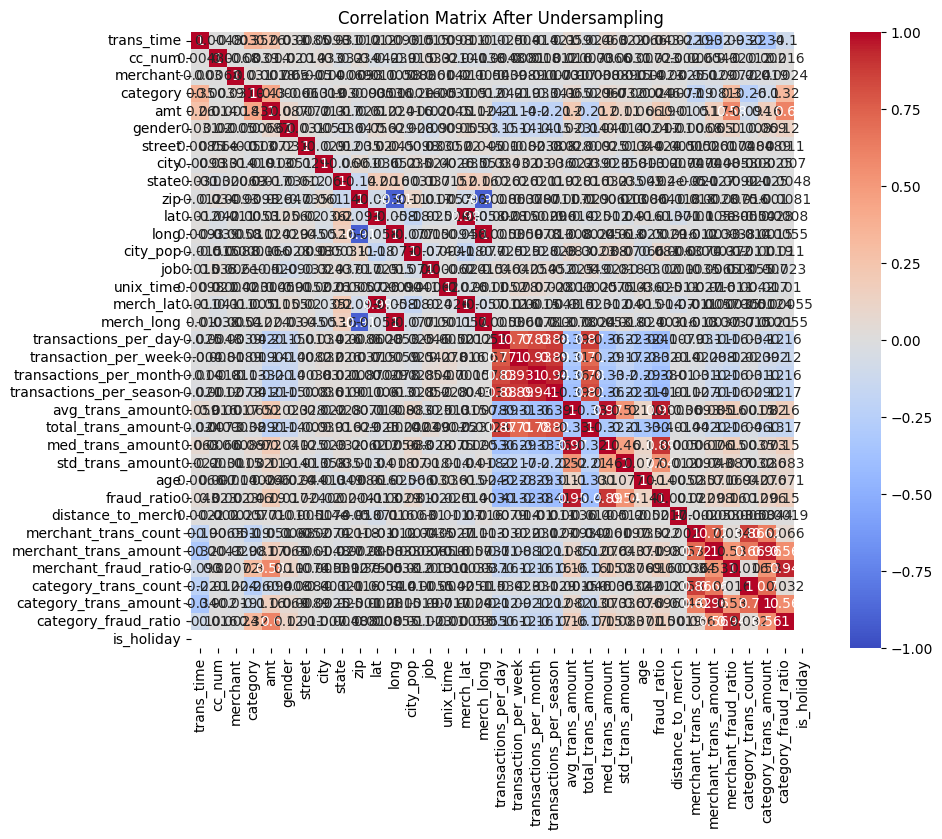

In [37]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix After Undersampling')
plt.show()

Based on the correlation matrix provided, we can identify features that have positive or negative relationships with the target variable `is_fraud`. Here's a detailed analysis:

### Positive Correlation with `is_fraud`
- **category (0.330677)**: This suggests that certain categories of transactions are more likely to be fraudulent.
- **amt (0.616014)**: Higher transaction amounts are positively correlated with fraud.
- **merchant_fraud_ratio (0.846450)**: A higher fraud ratio for merchants is strongly associated with fraudulent transactions.
- **category_fraud_ratio (0.505802)**: A higher fraud ratio in transaction categories is also strongly associated with fraudulent transactions.

### Negative Correlation with `is_fraud`
- **trans_time (-0.095741)**: The time of the transaction has a slight negative correlation with fraud, indicating certain times may see fewer fraudulent transactions.
- **merchant_trans_count (-0.222961)**: The number of transactions per merchant is negatively correlated with fraud, suggesting that merchants with more transactions might have fewer fraudulent transactions.
- **category_trans_count (-0.257370)**: The number of transactions in each category has a negative correlation with fraud, implying that categories with more transactions tend to have fewer fraudulent ones.
- **category_trans_amount (-0.375605)**: The total transaction amount per category is negatively correlated with fraud.
- **merchant_trans_amount (-0.347859)**: The total transaction amount per merchant is negatively correlated with fraud.

### Summary
The features with the strongest correlations (both positive and negative) with `is_fraud` are:
- **Positive Correlations**: `amt`, `merchant_fraud_ratio`, `category_fraud_ratio`
- **Negative Correlations**: `category_trans_amount`, `merchant_trans_amount`, `merchant_trans_count`, `category_trans_count`

These insights can guide the feature selection process for your fraud detection model, focusing on the most influential variables.

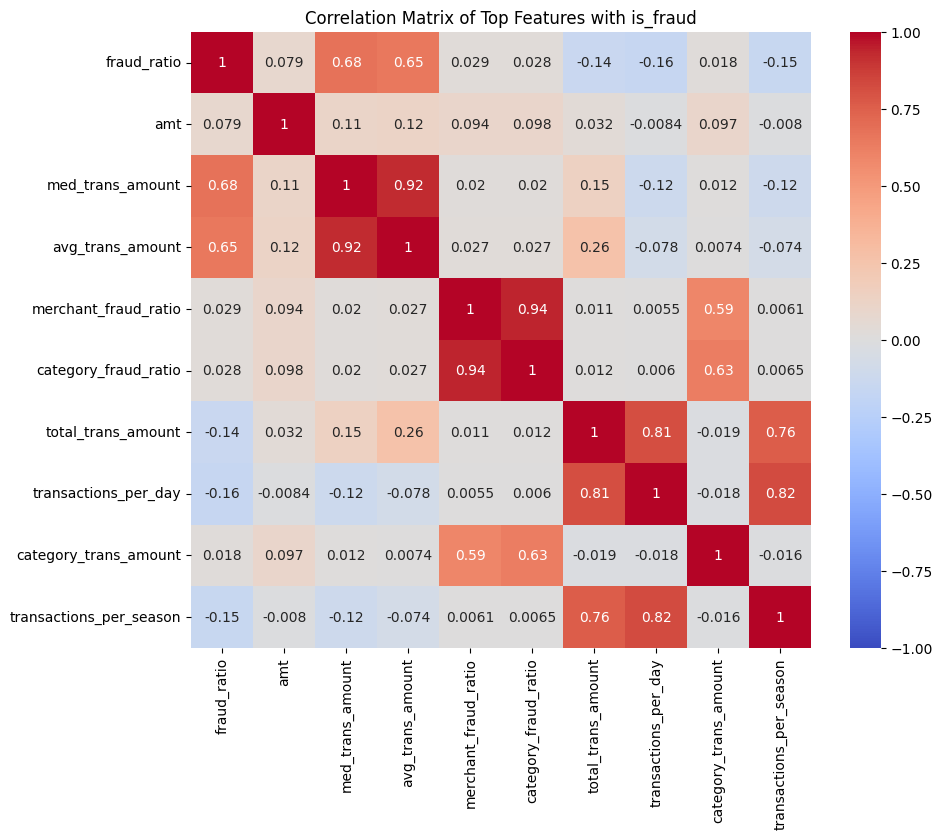

In [38]:
# Compute correlation matrix with the target variable
correlation_matrix = df_selected_features.corr()

# Get absolute correlations with the target variable
correlation_with_target = correlation_matrix['is_fraud'].abs().sort_values(ascending=False)

# Select top features based on correlation threshold (e.g., top 10)
top_features = correlation_with_target[1:11].index.tolist()  # Exclude 'is_fraud' itself

# Filter the correlation matrix to include only top features
top_features_corr = correlation_matrix.loc[top_features, top_features]

# Plotting the correlation matrix for top features
plt.figure(figsize=(10, 8))
sns.heatmap(top_features_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Top Features with is_fraud')
plt.show()

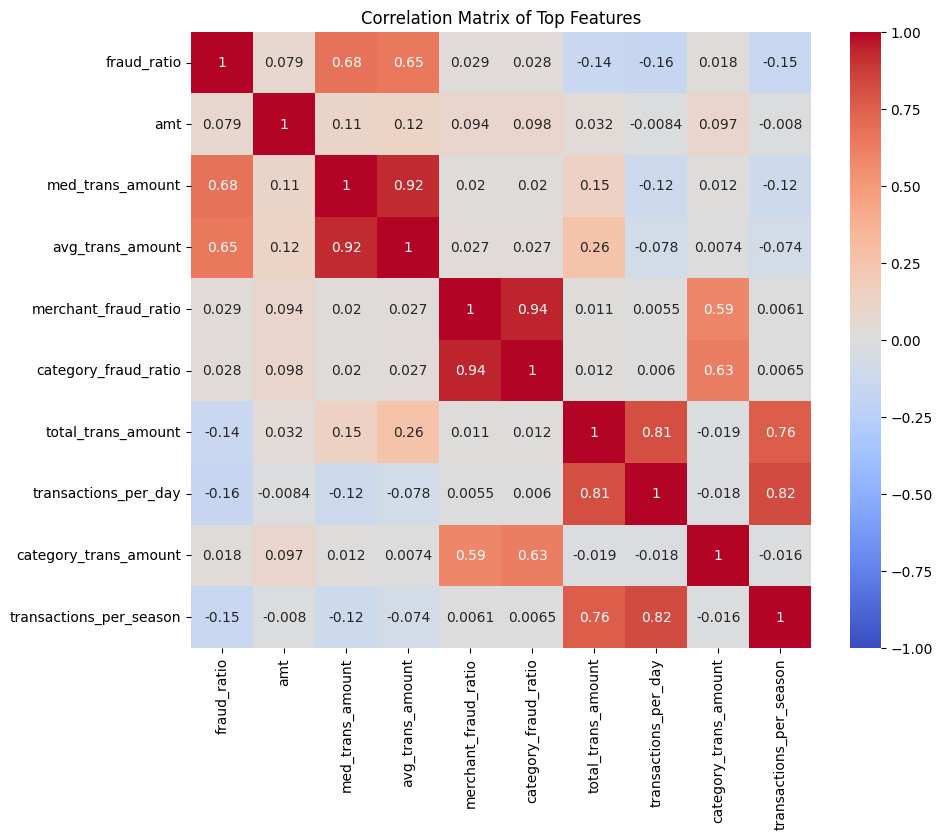

In [39]:
# Plotting the correlation matrix for top features
plt.figure(figsize=(10, 8))
sns.heatmap(top_features_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Top Features')
plt.show()

# Feature selection

In [40]:
from scipy.stats import chi2_contingency

#List of categorical columns to test
categorical_cols = ['Week', 'transaction_per_week', 'transactions_per_month', 'transactions_per_season', 'amt', 'merchant_fraud_ratio', 'category_fraud_ratio']

# Loop through each categorical column and perform chi-square test
results = []
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['is_fraud'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append({'Feature': col, 'Chi2': chi2, 'P-value': p})

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results)
print("Chi-square test results for categorical features and is_fraud:\n", results_df)

Chi-square test results for categorical features and is_fraud:
                    Feature           Chi2        P-value
0                     Week     921.768273  4.292633e-160
1     transaction_per_week    1906.615198   0.000000e+00
2   transactions_per_month  124405.349893   0.000000e+00
3  transactions_per_season  135966.042786   0.000000e+00
4                      amt  827594.588114   0.000000e+00
5     merchant_fraud_ratio    6929.586079   0.000000e+00
6     category_fraud_ratio    6486.003270   0.000000e+00


In [41]:
# Compute Pearson correlation coefficient
correlation = df[['Week', 'transaction_per_week', 'transactions_per_month', 'transactions_per_season', 'amt', 'merchant_fraud_ratio', 'category_fraud_ratio','is_fraud']].corr()['is_fraud']

print("Pearson correlation coefficients:")
print(correlation)

Pearson correlation coefficients:
Week                      -0.012183
transaction_per_week      -0.026677
transactions_per_month    -0.041221
transactions_per_season   -0.044288
amt                        0.219404
merchant_fraud_ratio       0.073103
category_fraud_ratio       0.070725
is_fraud                   1.000000
Name: is_fraud, dtype: float64


In [42]:
#Assuming df is your dataset with features and 'is_fraud' as the target
X = df[['transactions_per_day', 'avg_trans_amount', 'total_trans_amount',
        'med_trans_amount', 'std_trans_amount', 'age',
        'distance_to_merch', 'Week', 'transaction_per_week', 'transactions_per_month', 'transactions_per_season', 'amt', 'merchant_fraud_ratio', 'category_fraud_ratio']]
y = df['is_fraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selected_features = []  # Initialize an empty list to store selected features
accuracies = []          # Initialize an empty list to store accuracies

# Start a loop to select features one by one until all features are selected
while len(selected_features) < len(X.columns):
    max_acc = -1         # Initialize maximum accuracy to a very low value
    best_feature = None  # Initialize variable to store the best feature

    # Iterate through each feature in X.columns
    for feature in X.columns:
        if feature not in selected_features:  # Check if the feature is not already selected
            current_features = selected_features + [feature]  # Add the feature to the current selected features
            X_train_subset = X_train[current_features]       # Subset the training data with current features
            X_test_subset = X_test[current_features]         # Subset the testing data with current features

            # Initialize and train a logistic regression model
            clf = LogisticRegression(max_iter=1000, random_state=42)
            clf.fit(X_train_subset, y_train)
            y_pred = clf.predict(X_test_subset)  # Make predictions on the test data

            accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy of predictions

            # Check if current accuracy is better than previous maximum accuracy
            if accuracy > max_acc:
                max_acc = accuracy  # Update maximum accuracy
                best_feature = feature  # Update best feature

    # If adding the best feature improves accuracy, add it to selected features and record accuracy
    if max_acc > max(accuracies, default=0):
        selected_features.append(best_feature)
        accuracies.append(max_acc)
    else:
        break  # Exit the loop if no improvement in accuracy

# Print selected features and their corresponding accuracies
print("Selected Features:", selected_features)
print("Accuracies:", accuracies)

Selected Features: ['avg_trans_amount', 'total_trans_amount', 'transactions_per_day', 'transaction_per_week']
Accuracies: [0.9946671293886286, 0.9946825534540267, 0.9946864094703761, 0.9946902654867257]


In [43]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables into numerical values
df['merchant'] = label_encoder.fit_transform(df['merchant'])
df['category'] = label_encoder.fit_transform(df['category'])
df['city'] = label_encoder.fit_transform(df['city'])
df['state'] = label_encoder.fit_transform(df['state'])

In [44]:
# Drop irrelevant or personally identifiable information (PII) columns
df = df.drop(columns=["first", "last", "street", "trans_num", "dob", "trans_date", "trans_time", "job"])

# Apply the mapping to convert 'gender' column to numerical values
df['gender'] = df['gender'].map({'M': 1, 'F': 0})

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 34 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   cc_num                   1296675 non-null  int64  
 1   merchant                 1296675 non-null  int64  
 2   category                 1296675 non-null  int64  
 3   amt                      1296675 non-null  float64
 4   gender                   1296675 non-null  int64  
 5   city                     1296675 non-null  int64  
 6   state                    1296675 non-null  int64  
 7   zip                      1296675 non-null  int64  
 8   lat                      1296675 non-null  float64
 9   long                     1296675 non-null  float64
 10  city_pop                 1296675 non-null  int64  
 11  unix_time                1296675 non-null  int64  
 12  merch_lat                1296675 non-null  float64
 13  merch_long               1296675 non-null 

In [45]:
# Print the list of all column names in the DataFrame
print("Columns in the DataFrame:")
print(df.columns.tolist())

Columns in the DataFrame:
['cc_num', 'merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'transactions_per_day', 'Week', 'transaction_per_week', 'transactions_per_month', 'transactions_per_season', 'avg_trans_amount', 'total_trans_amount', 'med_trans_amount', 'std_trans_amount', 'age', 'fraud_ratio', 'distance_to_merch', 'merchant_trans_count', 'merchant_trans_amount', 'merchant_fraud_ratio', 'category_trans_count', 'category_trans_amount', 'category_fraud_ratio', 'is_holiday']


is_fraud
0    7506
1    7506
Name: count, dtype: int64


<Axes: xlabel='is_fraud', ylabel='count'>

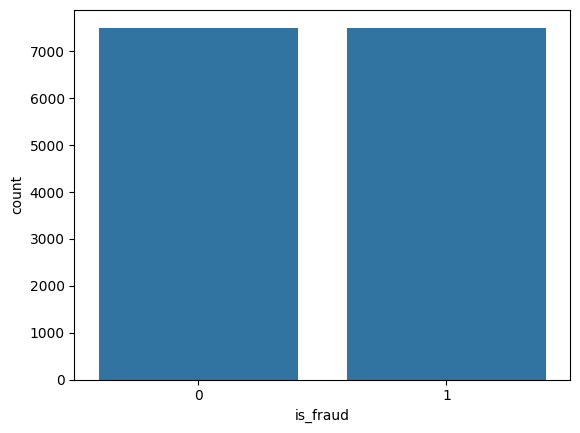

In [46]:
# Step 3: Split the data into features (X) and target (y)
X = df.drop(columns=['is_fraud'])  # Replace 'is_fraud' with your target column name if different
y = df['is_fraud']  # Replace 'is_fraud' with your target column name if different

# Step 4: Apply RandomUnderSampler to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)

# Create the new dataset df_under from the resampled data
df_under = pd.DataFrame(X_under, columns=X.columns)
df_under['is_fraud'] = y_under

# Check the balance of the resampled data
print(y_under.value_counts())
sns.countplot(x=y_under)

In [47]:
#Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_under.drop(columns=['is_fraud']), df_under['is_fraud'], test_size=0.2, random_state=42)

# Step 6: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Development

In [48]:
# Define models and their respective parameter grids for tuning
models = {
    'Logistic Regression': (LogisticRegression(random_state=42, max_iter=1000), {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    }),
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7]
    })
}

In [49]:
# Define cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
import joblib

# Dictionary to hold model results
model_results = {}

for model_name, (model, param_grid) in models.items():
    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Perform cross-validation on the best model
    cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    mean_cv_score = cv_scores.mean()
    
    # Train the best model on the full training data
    best_model.fit(X_train_scaled, y_train)
    
    # Predict on test data
    y_pred = best_model.predict(X_test_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Store the results
    model_results[model_name] = {
        'best_params': grid_search.best_params_,
        'cross_val_score': mean_cv_score,
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': confusion
    }
    
    # Print the results
    print(f"Model: {model_name}")
    print(f"Best Parameters: {model_results[model_name]['best_params']}")
    print(f"Cross-Validation Accuracy: {model_results[model_name]['cross_val_score']:.2f}")
    print(f"Test Accuracy: {model_results[model_name]['accuracy']:.2f}")
    print("Classification Report:")
    print(model_results[model_name]['classification_report'])
    print("Confusion Matrix:")
    print(model_results[model_name]['confusion_matrix'])
    print("\n")
    
    # Save the best model to a joblib file
    joblib_filename = f'{model_name.replace(" ", "_")}_model.joblib'
    joblib.dump(best_model, joblib_filename)
    print(f"Model saved as: {joblib_filename}")

Model: Logistic Regression
Best Parameters: {'C': 10, 'solver': 'liblinear'}
Cross-Validation Accuracy: 0.87
Test Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1507
           1       0.90      0.81      0.86      1496

    accuracy                           0.86      3003
   macro avg       0.87      0.86      0.86      3003
weighted avg       0.87      0.86      0.86      3003

Confusion Matrix:
[[1379  128]
 [ 282 1214]]


Model saved as: Logistic_Regression_model.joblib
Model: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Cross-Validation Accuracy: 0.96
Test Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1507
           1       0.97      0.95      0.96      1496

    accuracy                           0.96      3003
   macro avg       0.96      